## Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision

In [3]:
## Setting torch seed

random_seed = 1
torch.manual_seed(random_seed)

## Data Loaders and MINST DataSet

In [4]:
#Loaders Parameters
batch_size_train = 64
batch_size_test = 1000

path = "handwritten-digits-recognizer/"

transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST(path, train=True, download=True, transform=transform),
    batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST(path, train=False, download=True, transform=transform),
    batch_size=batch_size_test, shuffle=True)

100.0%
100.0%
100.0%
100.0%



### Examples

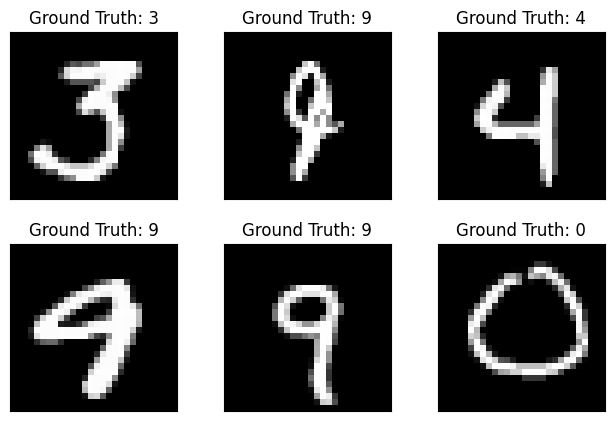

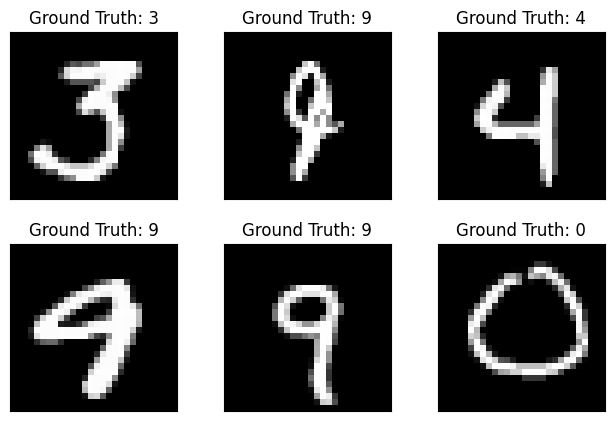

In [5]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

fig = plt.figure()
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])

fig

## Model Architecture

In [6]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)


## Training the model

=========== Epoch 1 ===========
=========== Epoch 2 ===========
=========== Epoch 3 ===========


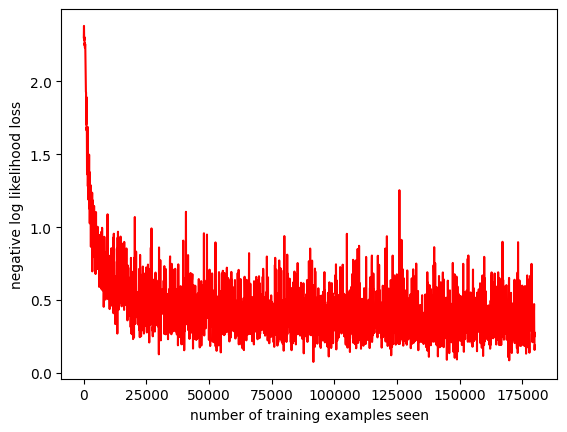

In [7]:



#Hyperparameters
n_epochs = 3
learning_rate = 0.01

model = MyModel()

optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.NLLLoss()

train_losses = []
train_counter = []

for epoch in range(n_epochs):
    model.train()
    print(f"=========== Epoch {epoch + 1} ===========")

    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)

        loss = criterion(output, target)
        train_losses.append(loss.item())
        train_counter.append((batch_idx * 64) + ((epoch) * len(train_loader.dataset)))

        loss.backward()
        optimizer.step()

plt.plot(train_counter, train_losses, color='red')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
plt.show()

## Saving a model


In [8]:
torch.save(model.state_dict(), "trained_models/model.pth")

## Testing a model


[1.16499621e-07 9.99794304e-01 2.03591717e-05 1.99144822e-07
 1.61009229e-04 1.04408321e-06 1.10844485e-05 4.30924302e-07
 9.66234165e-06 1.76863205e-06]
[3.4429736e-08 3.8174341e-19 7.3880568e-11 6.5172416e-14 3.1525604e-10
 1.4285618e-08 1.0000000e+00 9.8570396e-21 7.0268069e-10 4.3648375e-12]
[3.4261996e-10 4.8508675e-10 2.6823358e-05 1.2202856e-06 3.2802598e-09
 1.7648189e-12 1.3024291e-18 9.9996960e-01 6.0525849e-08 2.2474862e-06]
[9.3792140e-13 3.3871846e-08 6.1675215e-05 9.9735570e-01 1.9377286e-07
 5.1884598e-07 1.4271317e-16 2.5745255e-03 4.4791291e-06 2.8381855e-06]
[5.0560222e-05 4.6317741e-11 5.1464017e-08 2.6030267e-07 1.1301301e-09
 1.6550044e-02 9.8287338e-01 5.0730557e-15 5.2574137e-04 5.5072911e-09]
[1.02257638e-06 9.48881933e-08 2.63036163e-05 7.32214767e-06
 3.30797297e-06 3.52789016e-08 1.36412956e-11 9.99173880e-01
 7.48010791e-07 7.87431083e-04]
[2.2693438e-07 3.6526060e-07 1.3208247e-03 7.0226117e-05 4.5762286e-07
 1.8280533e-09 3.9212323e-14 9.9851376e-01 1.5087

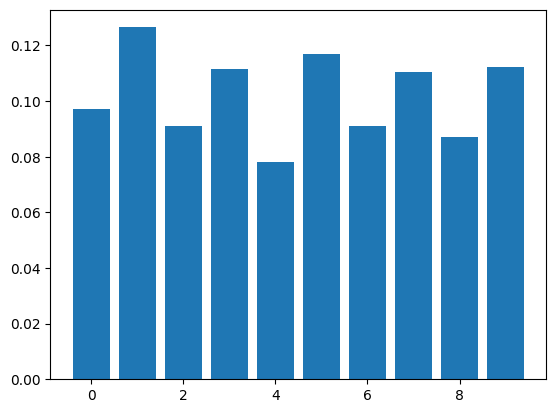

In [9]:
test_losses = []

test_loss = 0
correct = 0

model.eval()
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)

        test_loss += criterion(output, target).item()
        pred = output.data.max(1, keepdim=True)[1]

        correct += pred.eq(target.data.view_as(pred)).sum()

        test_losses.append(criterion(output, target).item())

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(test_loss, correct,
                                                                              len(test_loader.dataset),
                                                                              100. * correct / len(
                                                                                  test_loader.dataset)))

counter = np.arange(len(test_losses))
plt.bar(counter, test_losses)
plt.show()